# Poisson GLM


In [26]:
%matplotlib inline

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

In [27]:
X_train = pd.read_pickle('../assets/X_train.pkl')
X_test = pd.read_pickle('../assets/X_test.pkl')
y_train = pd.read_pickle('../assets/y_train.pkl')
y_test = pd.read_pickle('../assets/y_test.pkl')

In [28]:
X_train = sm.add_constant(X_train, prepend=False)

In [29]:
# ss = StandardScaler()

In [30]:
# X_train = ss.fit_transform(X_train)

In [31]:
glm_poisson = sm.GLM(y_train, X_train, family=sm.families.Poisson())
res = glm_poisson.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             WnvPresent   No. Observations:                 6483
Model:                            GLM   Df Residuals:                     6452
Model Family:                 Poisson   Df Model:                           30
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -855.61
Date:                Mon, 24 Sep 2018   Deviance:                       1189.2
Time:                        10:48:35   Pearson chi2:                 5.14e+03
No. Iterations:                    23   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Day_length                        -0.0008      0.000     -2.794      0.005      -0.001     

In [32]:
print('T-values: ', res.tvalues)

T-values:  Day_length                       -2.794450
Tmax                              2.558324
Tmin                              2.491671
Tavg                             -0.028362
ResultSpeed                       0.401234
ResultDir                        -1.744007
AvgSpeed                          0.413214
Sunset                            0.131645
Heat                             -0.019518
Depart                           -1.136607
DewPoint                         -0.022384
Cool                              0.019272
PrecipTotal                      -0.307709
StnPressure                       0.718403
Latitude                         -3.946284
Longitude                        -7.361196
Month                            -2.175948
Day_length_exp                    3.112754
Tavg_shift                        1.776634
Heat_exp                         -3.285568
Cool_shift                        1.556053
Tmax_shift                       -0.747323
Tmin_shift                       -0.428626


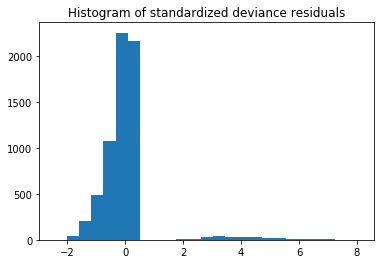

In [33]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

In [34]:
with open('../assets/poisson_model','wb+') as f:
    pickle.dump(res,f)